In [140]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
import random
import matplotlib.patches as patches

warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division

plt.rcParams["figure.figsize"] = (20, 10)
from itertools import chain
import tqdm as tqdm

# from colorthief import ColorThief

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

In [141]:

# logic :
# 1 su vu se co nhieu bai dang va cac share
# cac bai dang se lien ket voi cac bai share
# trường hơp 1 su vu co 1 nguoi nhieu lan đăng bài => xử lý tạm thời, giữ nguyên mỗi bài đăng là 1 mqh.
# tạm thời chỉ có các bài share có quan hệ với các post chính.



In [142]:
dataRoot = pd.read_excel('Data chạy mạng lưới.xlsx', sheet_name=0)
print(dataRoot.shape)
dataRoot.head(100)

(30, 10)


,Source User,Target User,Point,Message,Like,Share,Cmt,Link,Type,Comment
0,Văn Toàn,NaN,1856,Bạn có biết?\nMỗi ngày tù của nguyên chủ tịch ...,1500,287,69,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Post,NaN
1,Nguyễn Ngọc Sĩ Nguyên,Văn Toàn,8,mỗi ngày 2 tỷ mà xây gần 100 căn nhà tình nghĩ...,1,0,7,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,1.0
2,Minh Hung,Nguyễn Ngọc Sĩ Nguyên,1,Mỗi can la khoảng 20 tr là đúng rồi. Vi du can...,1,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
3,Nguyễn Ngọc Sĩ Nguyên,Nguyễn Ngọc Sĩ Nguyên,1,20tr xây được căn nhà?,1,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
4,Công Danh,Nguyễn Ngọc Sĩ Nguyên,0,Nguyên Nguyễn nhà nước chỉ hỗ trợ dẫn mỗi căn ...,0,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
5,Nguyễn Ngọc Sĩ Nguyên,Nguyễn Ngọc Sĩ Nguyên,0,Lê Công Danh vậy là nếu bạn cầm 2 tỷ tiền của ...,0,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
6,Nhật Trường,Nguyễn Ngọc Sĩ Nguyên,0,"Lê Công Danh nói đúng đó bạn, quê mình cũng vậy",0,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
7,Huỳnh Minh Long,Nguyễn Ngọc Sĩ Nguyên,0,"Nguyên Nguyễn vớ vẩn, người ta đang so sánh dự...",0,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
8,Huỳnh Minh Long,Nguyễn Ngọc Sĩ Nguyên,0,Nguyên Nguyễn còn 2 tỷ xây dc 20 căn là 100tr ...,0,0,0,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,2.0
9,Bill Pham,Văn Toàn,23,Sẽ hình thành nghề mới: Nghề đi tù.\nĐi tù thu...,19,0,4,https://www.facebook.com/nhatkyyeunuoc1/posts/...,Comment,1.0


In [143]:

# for index, row in data.iterrows():
#     if row['Source Name'] == row['Target Name']:
#         print(row['Source Name'], row['Target Name'])
#         newData = data.drop(row[index], axis=1)
# print(newData)
dataPost = {}
for index, row in dataRoot.iterrows():
    if row['Type'] == 'Post':
        dataPost[row['Source User']] = row['Point']

print(dataPost)
data = dataRoot.groupby((dataRoot['Source User'] + dataRoot['Target User']), as_index=False).agg(
    {'Source User': 'min', 'Target User': 'min', 'Point': 'sum', 'Comment': 'sum', 'Like': 'sum'})
for index, row in data.iterrows():
    if row['Source User'] == row['Target User']:
        data.at[index, 'Point'] = row['Point'] / 2
        data.at[index, 'Comment'] = row['Comment'] / 2
        data.at[index, 'Like'] = row['Like'] / 2
print(data)


davao
davao
davao
{'Văn Toàn': 1856, 'Bankers có gì vui ?': 362, 'Hung Phan Xuan': 117}
              Source User            Target User  Point  Comment  Like
0               Bill Pham               Văn Toàn     23      1.0    19
1                 Binh To           Trần Nhân Ái      2      4.0     2
2               Bình Minh              Bình Minh      0      1.5     0
3               Bình Minh              Nguyen Ha      0      2.0     0
4               Công Danh  Nguyễn Ngọc Sĩ Nguyên      0      2.0     0
5           Dung Mai Tien              Bill Pham      0      2.0     0
6         Huỳnh Minh Long  Nguyễn Ngọc Sĩ Nguyên      0      4.0     0
7             Lan Michael       Nguyen Ngoc Long      1      2.0     1
8               Minh Hung  Nguyễn Ngọc Sĩ Nguyên      1      2.0     1
9               Nguyen Ha    Bankers có gì vui ?      3      1.0     0
10              Nguyen Ha          Phạm Thị Đông      0      3.0     0
11       Nguyen Ngoc Long       Nguyen Ngoc Long      0     

In [144]:
G = nx.from_pandas_edgelist(data,
                            source='Source User',
                            target='Target User',
                            edge_attr='Point',
                            create_using=nx.DiGraph())

In [145]:
print(nx.info(G))


DiGraph with 21 nodes and 24 edges


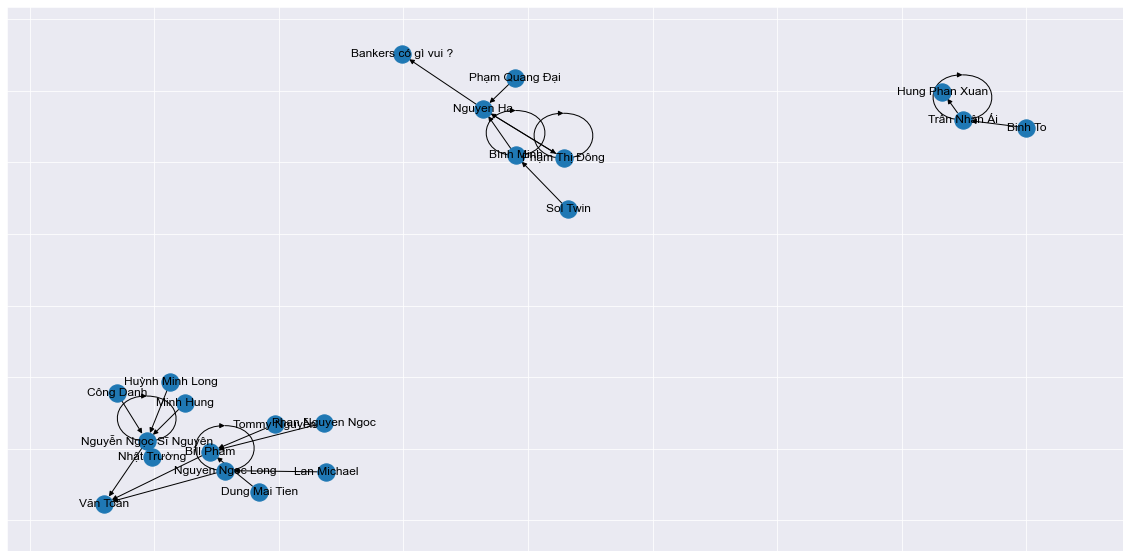

In [146]:
nx.draw_networkx(G)

In [147]:
weighted_degrees = dict(nx.degree(G, weight='Point'))
for post in dataPost:
    if weighted_degrees[post]:
        weighted_degrees[post] += dataPost[post]
print(weighted_degrees)

{'Bill Pham': 24, 'Văn Toàn': 1895, 'Binh To': 2, 'Trần Nhân Ái': 11, 'Bình Minh': 0, 'Nguyen Ha': 4, 'Công Danh': 0, 'Nguyễn Ngọc Sĩ Nguyên': 9, 'Dung Mai Tien': 0, 'Huỳnh Minh Long': 0, 'Lan Michael': 1, 'Nguyen Ngoc Long': 9, 'Minh Hung': 1, 'Bankers có gì vui ?': 365, 'Phạm Thị Đông': 1, 'Nhật Trường': 0, 'Phan Nguyen Ngoc': 1, 'Phạm Quang Đại': 0, 'Sol Twin': 0, 'Tommy Nguyễn': 0, 'Hung Phan Xuan': 124}


In [148]:
# handle image node
import glob
import matplotlib.image as mpimg

path = 'avatar/'
files = [f for f in glob.glob(path + "*.jpg")]
img = []
for f in files:
    img.append(mpimg.imread(f))
N = len(files)
print(N)

5


489.8979485566356
4353.159771935783
141.4213562373095
331.66247903554
100.0
200.0
100.0
300.0
100.0
100.0
100.0
300.0
100.0
1910.49731745428
100.0
100.0
100.0
100.0
100.0
100.0
1113.5528725660042


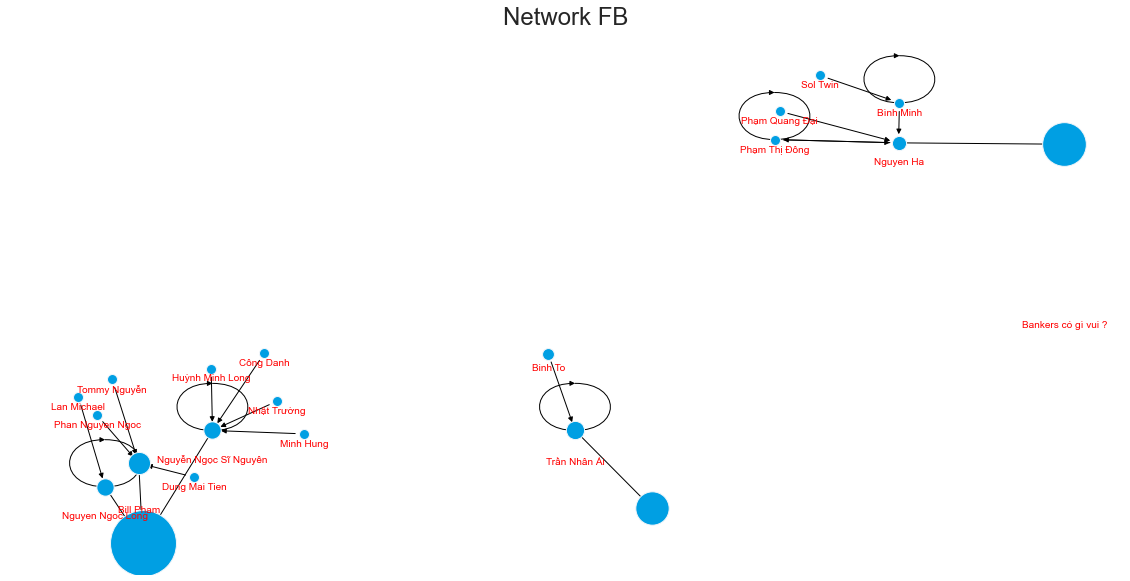

In [152]:
ax = plt.gca()
fig = plt.gcf()
plt.axis('off')
plt.title('Network FB', fontsize=24)

pos = nx.spring_layout(G)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

# tick_params = {'top': 'off', 'bottom': 'off', 'left': 'off', 'right': 'off',
#                'labelleft': 'off', 'labelbottom': 'off'}  #flag grid params
# styles = ['dotted','dashdot','dashed','solid'] # line styles


# draw edges
for e in G.edges(data=True):
    # width = max(e[2]['Point'],1)/100  #normalize by max points
    nx.draw_networkx_edges(G, pos, edgelist=[e], width=1, style='solid')
    # in networkx versions >2.1 arrowheads can be adjusted

    # draw nodes
# for node in G.nodes():
#     print(node)
#     print(G.degree(node, weight='Point'))
#     imsize = max((0.3 * G.degree(node, weight='points')
#                   / max(dict(G.degree(weight='points')).values())) ** 2, 0.02)
#     print(imsize)
#     # size is proportional to the votes
#     # flag = mpl.image.imread(flags[node])
#
#     (x, y) = pos[node]
#     xx, yy = trans((x, y))  # figure coordinates
#     xa, ya = trans2((xx, yy))  # axes coordinates
#
#     # matplotlib.pyplot.axes
#     # them 1 truc vao hinh hien tai va bien no thanh truc hien tai.
#     # [left, bottom, width, height]
#     country = plt.axes([xa - imsize / 2.0, ya - imsize / 2.0, imsize, imsize])
#
#     # chen anh vao node
#     country.imshow(img[random.randint(0, N - 1)])
#     # ti le cua node. equal, auto, 0.7
#     country.set_aspect('equal')
#     # print(imsize/2)
#
#     # make cicle avatar
#     # patch = patches.Circle((xa, ya), radius=imsize/2.0, transform=ax.transData)
#     # country.set_clip_path(patch)
#     # country.tick_params(**tick_params)
#     country.axis('off')

def nudge(poss):
    return { n: (x, y - (100 * max(weighted_degrees[n], 1)**0.5)*0.0003) for n,(x,y) in poss.items()}

for node in G.nodes():
    size = 100 * max(weighted_degrees[node], 1)**0.5
    print(size)
    ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')
posNode = nudge(pos)
nx.draw_networkx_labels(G, posNode, font_size=10, font_color='red');

fig.savefig('images/network-fb.png', facecolor='white')